# Credit Card Fraud Detection

[Anonymized credit card transactions labeled as fraudulent or genuine](https://www.kaggle.com/mlg-ulb/creditcardfraud).

## Config

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from plotting import (plot_1d_corr_heatmap, 
                      multiple_histograms_plot,
                      countplot_independent_ylims)

from scipy.stats import pointbiserialr

In [12]:
%matplotlib inline

In [13]:
# exibe todas as colunas do DataFrame
pd.options.display.max_columns = 35

# deixa de utilizar a notação científica
pd.options.display.float_format = lambda x: '%.2f' % x

## Preparação do dataset

In [14]:
df = pd.read_csv('../data/creditcard.csv')

In [15]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

## Análise Exploratória

In [16]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,0.09,-0.55,-0.62,-0.99,-0.31,1.47,-0.47,0.21,0.03,0.40,0.25,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0
1,0.00,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,-0.17,1.61,1.07,0.49,-0.14,0.64,0.46,-0.11,-0.18,-0.15,-0.07,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0
2,1.00,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,0.21,0.62,0.07,0.72,-0.17,2.35,-2.89,1.11,-0.12,-2.26,0.52,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0
3,1.00,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,-0.05,-0.23,0.18,0.51,-0.29,-0.63,-1.06,-0.68,1.97,-1.23,-0.21,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0
4,2.00,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,0.75,-0.82,0.54,1.35,-1.12,0.18,-0.45,-0.24,-0.04,0.80,0.41,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

A variáveis anonimizadas foram geradas com uma técnica chamada PCA, que cria variáveis descorrelacionadas.
Vamos então analisar a correlação das features com o target `Class`.

Enquanto as variáveis são contínuas, o target é binário. Para correlação entre uma variável contínua e uma binária, podemos utilizar a correlação de Pearson, que nesse caso é equivalente ao coeficiente de correlação [Ponto Biserial](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pointbiserialr.html).

In [18]:
def point_biserial_corr(binary_series, continuous_df):
    corr = {}
    for col_name in continuous_df:
        corr[col_name] = pointbiserialr(binary_series, 
                                        continuous_df[col_name]).correlation
    
    return pd.Series(corr, name=f"Correlation with '{binary_series.name}'")

In [20]:
corr = point_biserial_corr(df['Class'], df.drop(columns='Class'))

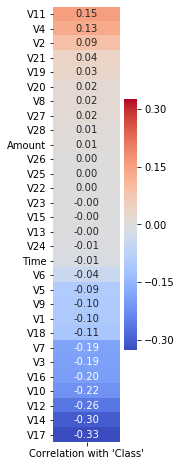

In [21]:
plot_1d_corr_heatmap(corr)


### Class

In [22]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

### Time

Vamos verificar se a coluna `Time` não deveria ser `int`:

In [23]:
df['Time'].apply(float.is_integer).all()

True

In [24]:
def time_to_int(dataframe):
    df_copy = dataframe.copy()
    df_copy['Time'] = df_copy['Time'].astype(int)
    return df_copy

In [25]:
df = time_to_int(df)

In [26]:
n_time_bins = 24
time_bins = range(0, 
                  df['Time'].max(), 
                  df['Time'].max() // n_time_bins)
list(time_bins)

[0,
 7199,
 14398,
 21597,
 28796,
 35995,
 43194,
 50393,
 57592,
 64791,
 71990,
 79189,
 86388,
 93587,
 100786,
 107985,
 115184,
 122383,
 129582,
 136781,
 143980,
 151179,
 158378,
 165577,
 172776]

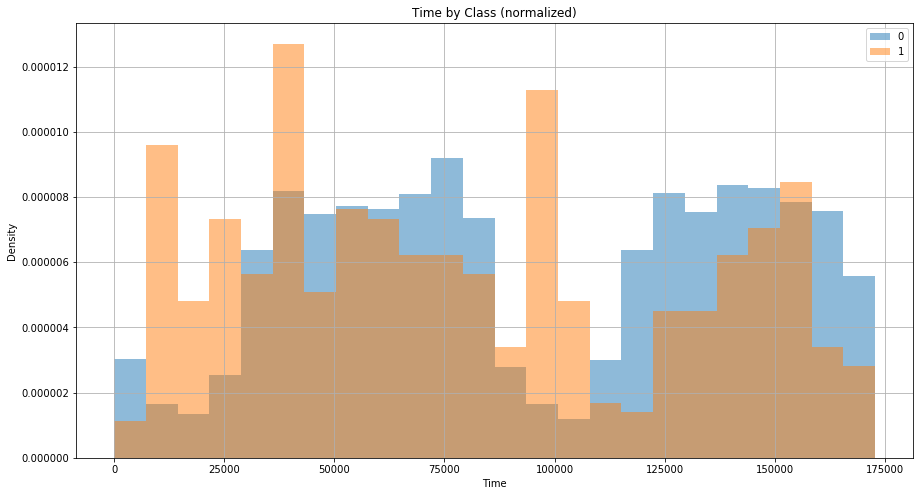

In [27]:
multiple_histograms_plot(df, x='Time', hue='Class', bins=time_bins,
                         title="Distribuição de 'Time' (normalizada)",
                         density=True)

In [28]:
day_1_daytime_start = time_bins[4]
day_1_daytime_end = time_bins[12]

day_2_daytime_start = time_bins[16]
day_2_daytime_end = time_bins[24]

In [29]:
def add_daytime_col(dataframe):
    df_copy = dataframe.copy()
    
    df_copy['Time_daytime'] = (((df_copy['Time'] >= day_1_daytime_start) 
                                  & (df_copy['Time'] <= day_1_daytime_end))
                               | ((df_copy['Time'] >= day_2_daytime_start) 
                                  & (df_copy['Time'] <= day_2_daytime_end))).astype(int)
    
    return df_copy

In [30]:
df = add_daytime_col(df)

/Users/gabrielcs/anaconda/envs/tera-nov19/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


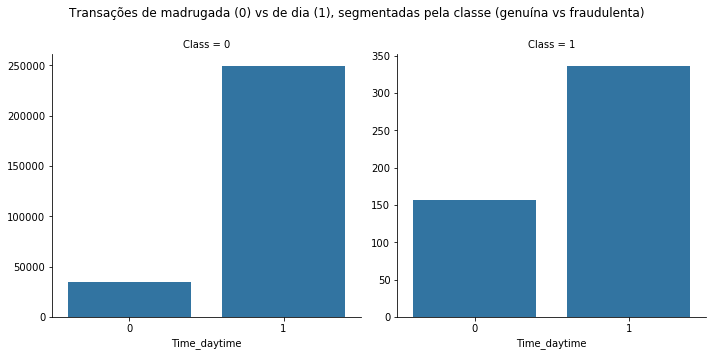

In [31]:
countplot_independent_ylims(df, col='Time_daytime', hue='Class', 
                            hue_order=[0, 1],
                            title='Transações de madrugada (0) vs de dia (1), '
                                  'segmentadas pela classe (genuína vs fraudulenta)')

É possível ver acima que a proporção de transações fraudulentas no que julgamos ser o período da madrugada parece ser maior do que o normal.

### Amount

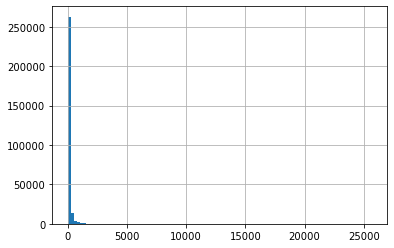

In [32]:
df['Amount'].hist(bins=100)

In [33]:
high_transactions = df['Amount'] > 1500

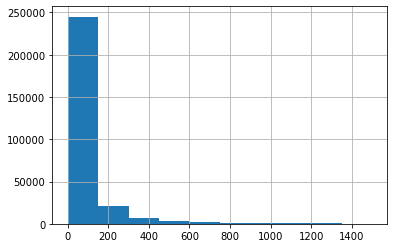

In [34]:
df.loc[~high_transactions, 'Amount'].hist()

É possível que uma transformação de log funcione bem para `Amount`. 

Antes disso, vamos verificar se existem valores comuns em caso de fraude.

In [35]:
fraud = df['Class'] == 1

In [36]:
(df.loc[fraud, 'Amount']
     .value_counts()
     .sort_values(ascending=False)
     .head(15))

1.00      113
0.00       27
99.99      27
0.76       17
0.77       10
0.01        5
2.00        4
3.79        4
12.31       3
0.68        3
1.18        3
2.28        3
1.10        3
45.51       2
252.92      2
Name: Amount, dtype: int64

Vamos comparar as proporções desses 3 valores mais comuns com as transações genuinas.

In [37]:
def add_amount_cols(dataframe):
    df_copy = dataframe.copy()
    df_copy['Amount_1'] = df_copy['Amount'] == 1
    df_copy['Amount_99_99'] = df_copy['Amount'] == 99.99
    df_copy['Amount_0'] = df_copy['Amount'] == 0
    return df_copy

In [38]:
df = add_amount_cols(df)

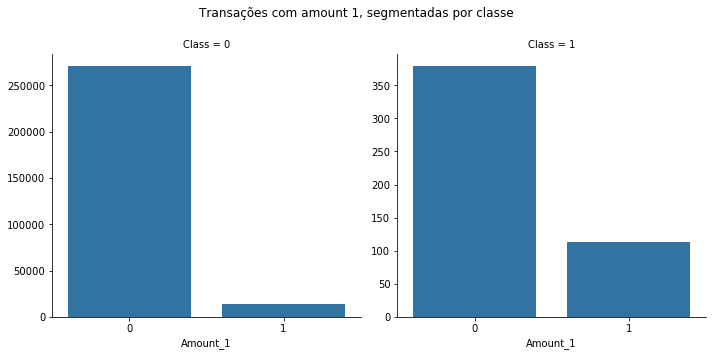

In [39]:
countplot_independent_ylims(df, col='Amount_1', hue='Class', 
                            hue_order=[0, 1],
                            title='Transações com amount 1, '
                                  'segmentadas por classe')

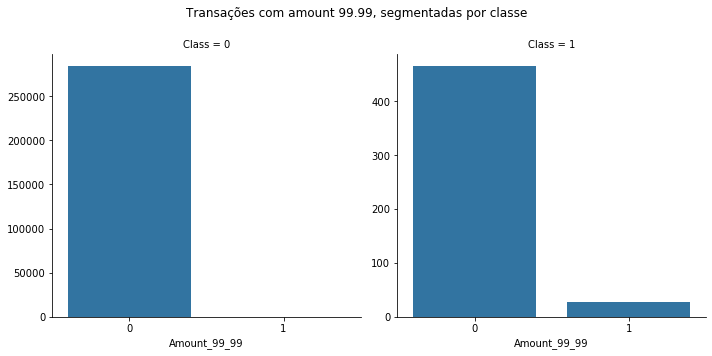

In [40]:
countplot_independent_ylims(df, col='Amount_99_99', hue='Class', 
                            hue_order=[0, 1],
                            title='Transações com amount 99.99, '
                                  'segmentadas por classe')

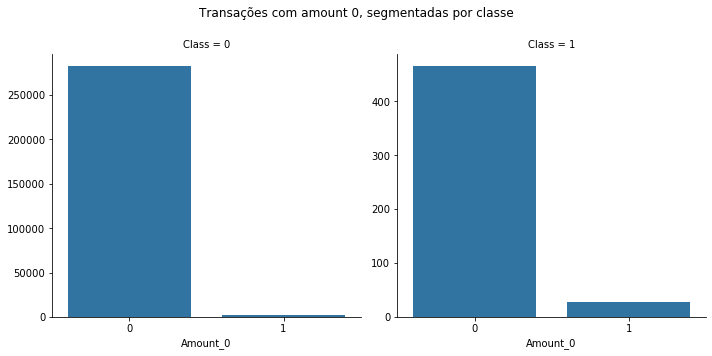

In [41]:
countplot_independent_ylims(df, col='Amount_0', hue='Class', 
                            hue_order=[0, 1],
                            title='Transações com amount 0, '
                                  'segmentadas por classe')

No mais, apesar de estranho, temos transações de valor zero tanto em transações genuínas quanto em fraudes. Dessa forma, aplicaremos o log somente para efeito de visualização.

De qualquer forma, vamos observar os valores `log(99.99)` e `log(1)=0`.

In [42]:
np.log(99.99)

4.605070180987758

In [44]:
amount_0 = df['Amount_0']
df['Amount_log'] = np.log(df.loc[~amount_0, 'Amount'])

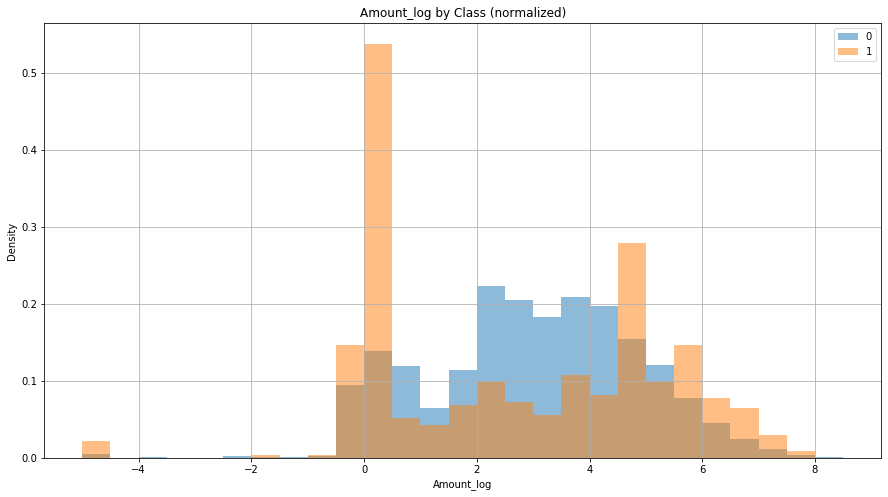

In [45]:
multiple_histograms_plot(df, x='Amount_log', hue='Class', density=True,
                         title="Distribuição de 'Amount' (normalizada)",
                         bins=np.arange(-5, 9, 0.5))

### Features anonimizadas

/Users/gabrielcs/Documents/workspace/tera-ds/tera-datascience-out2019/09-project-eda/code/plotting.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=figsize)


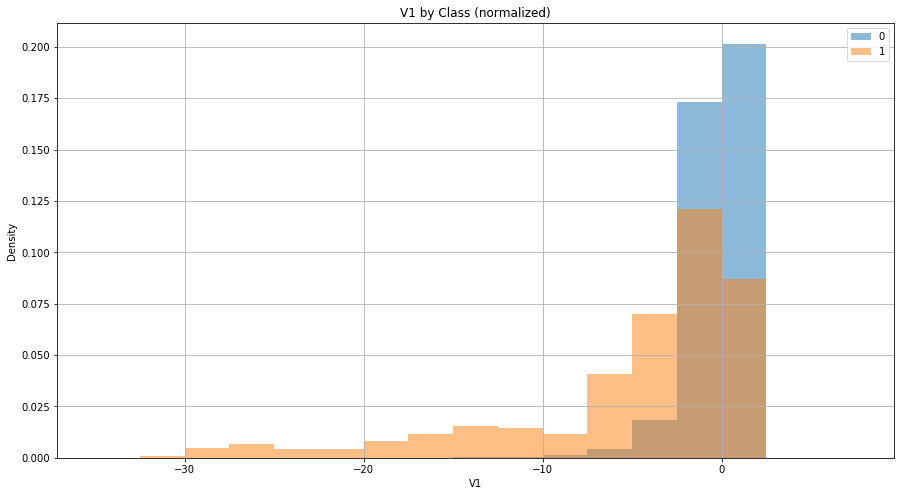

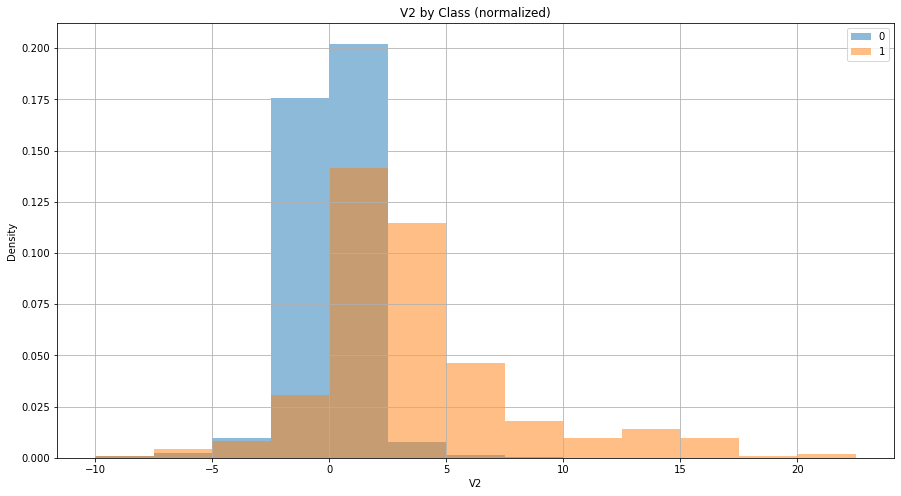

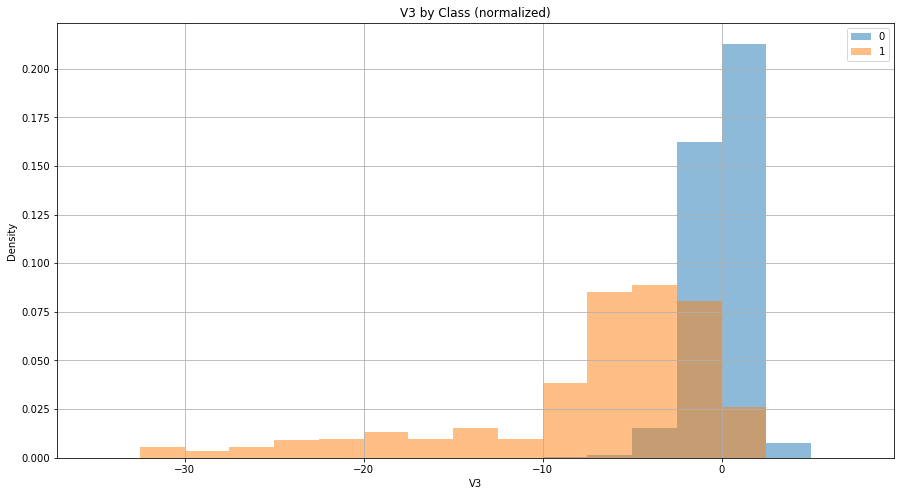

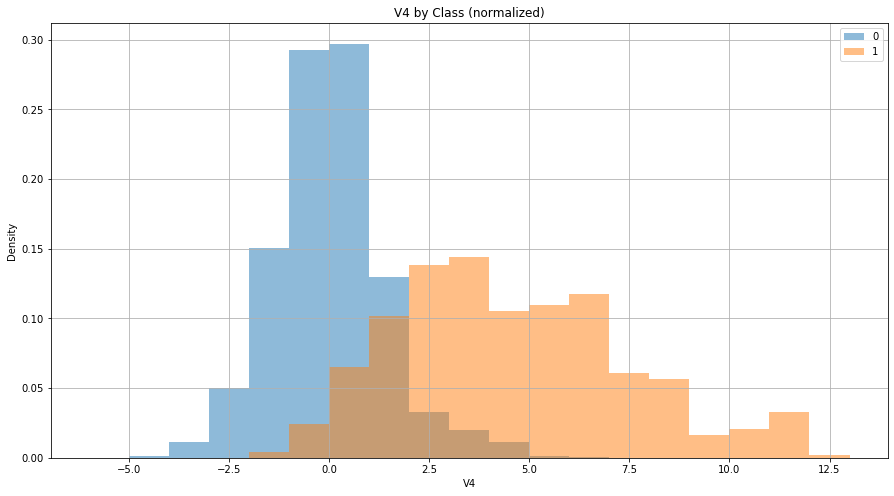

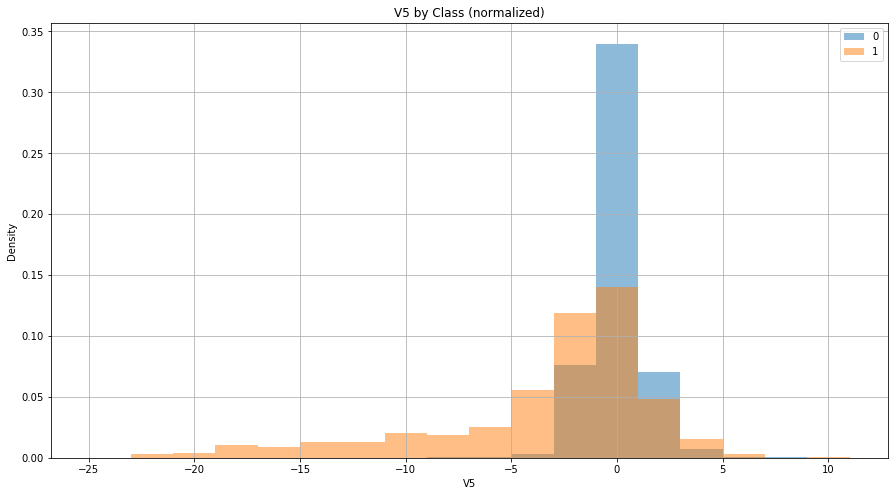

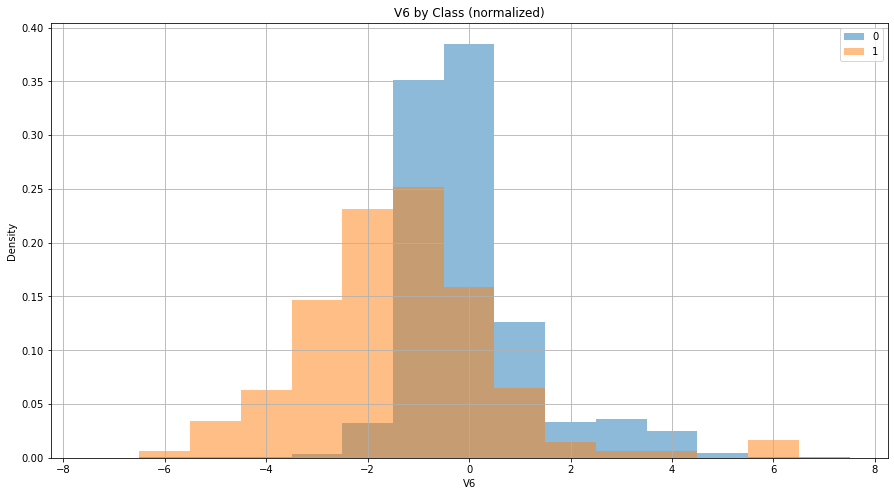

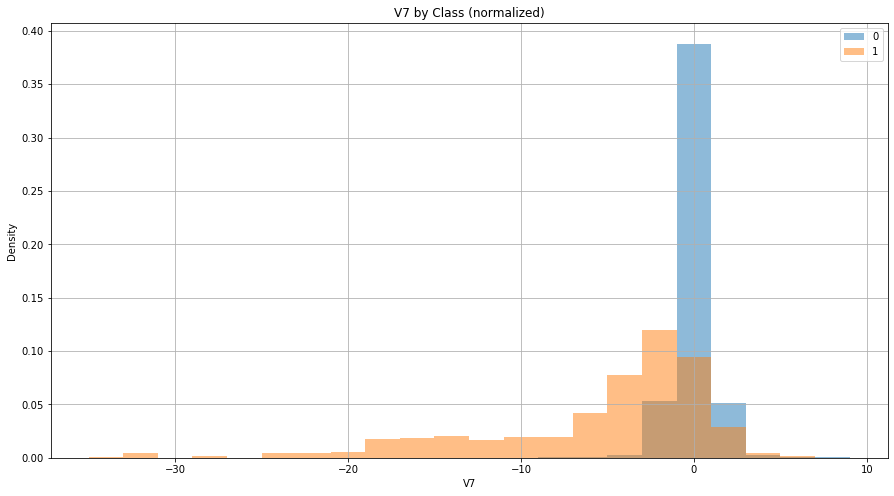

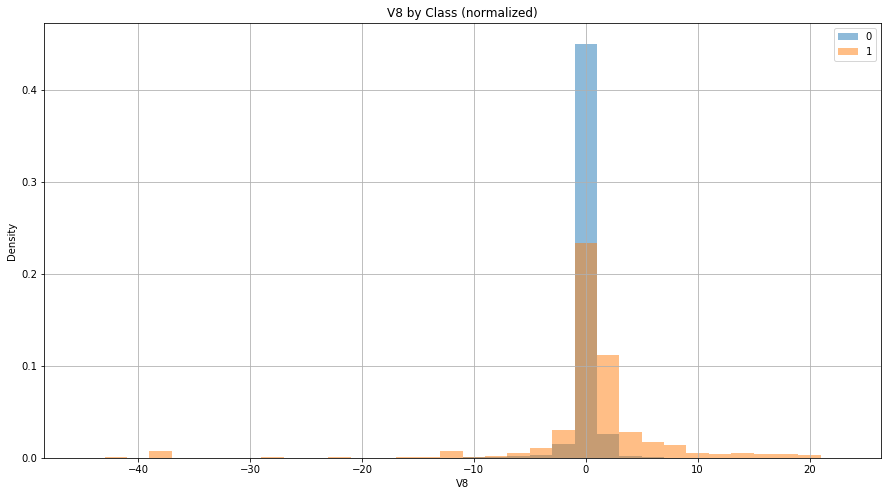

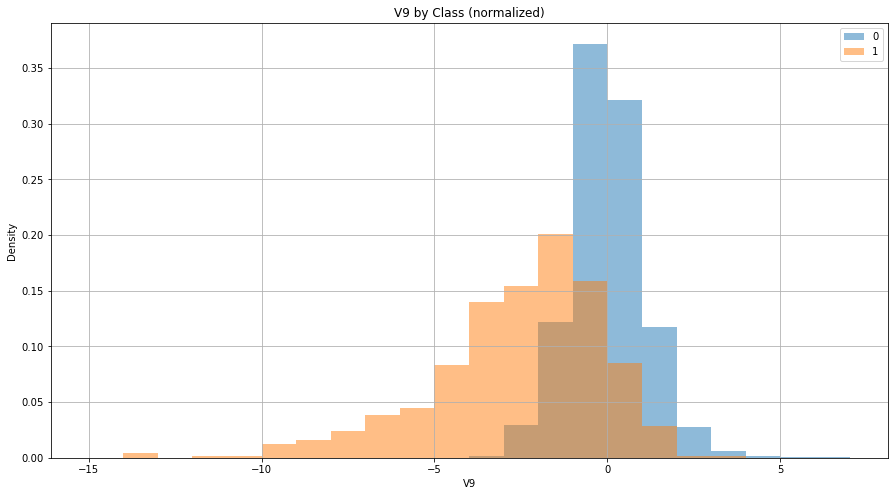

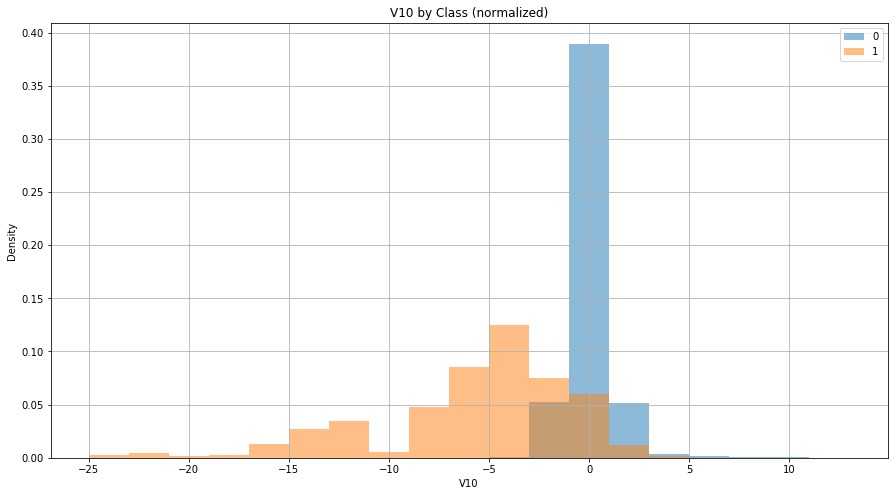

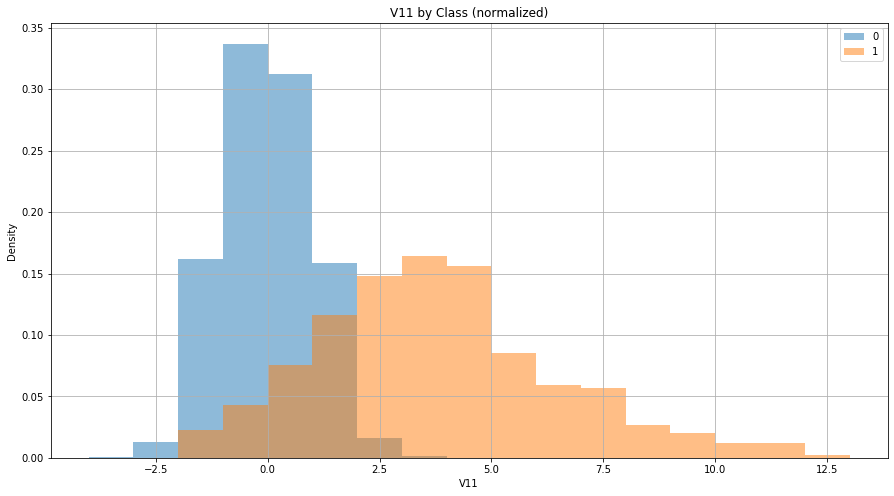

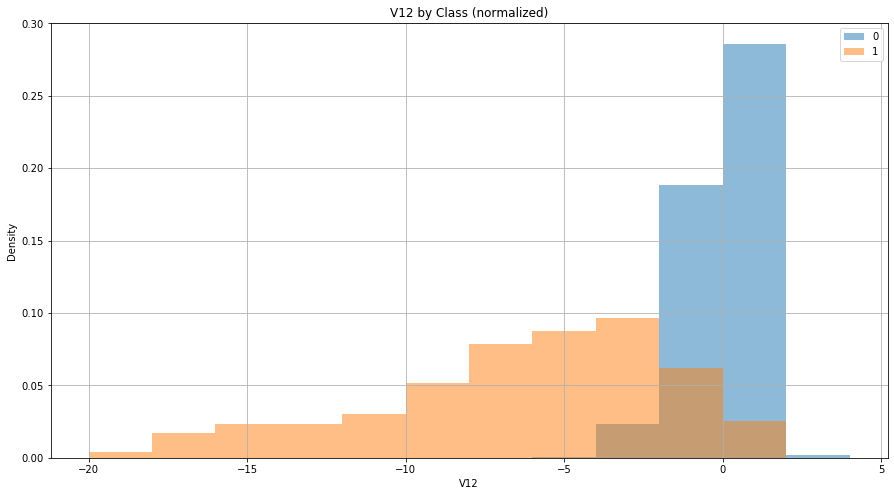

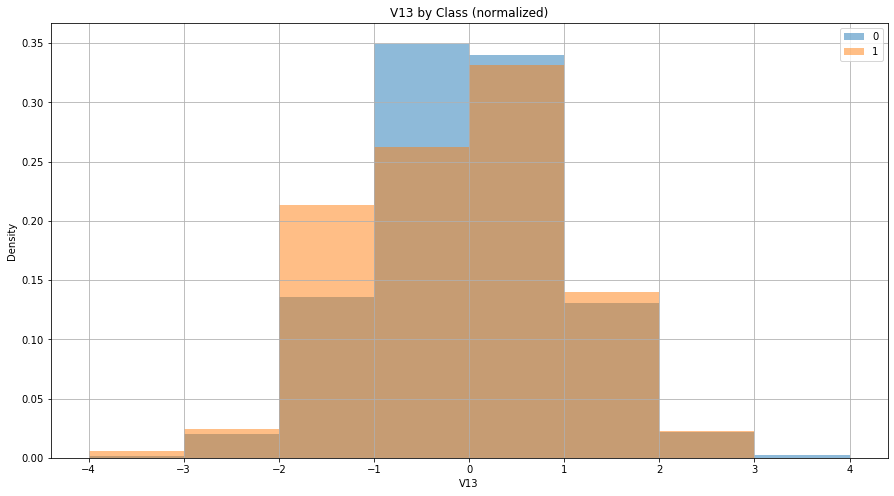

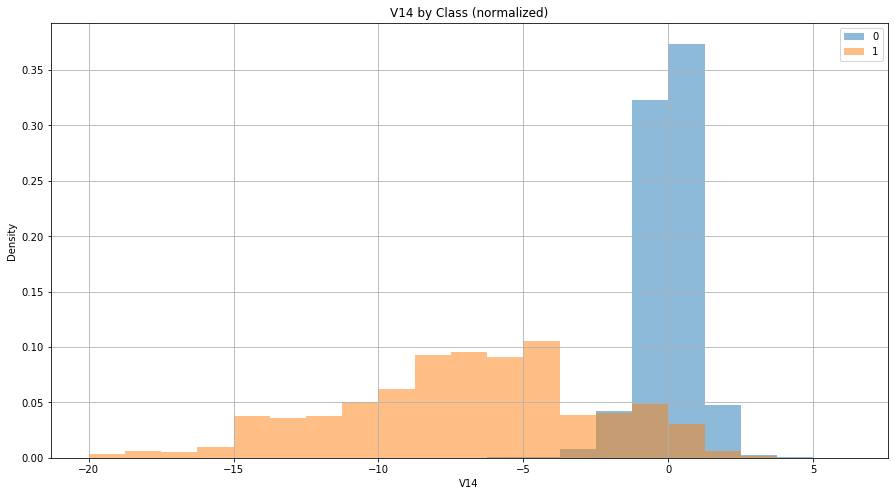

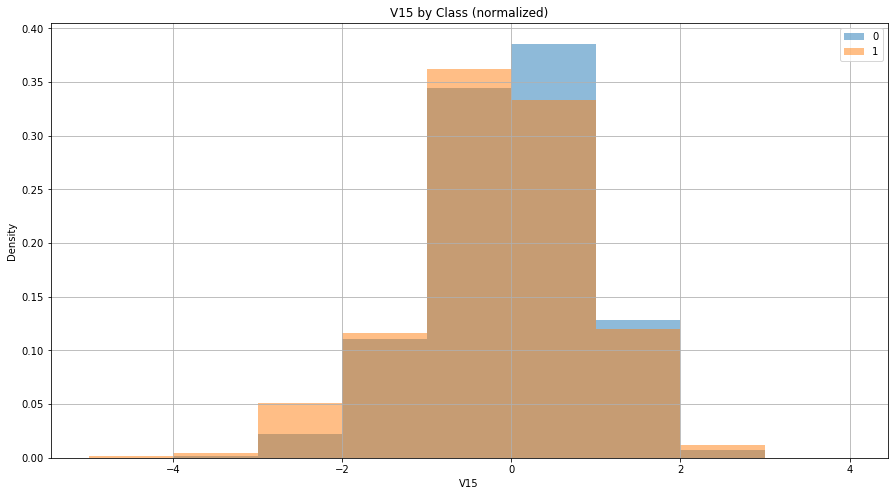

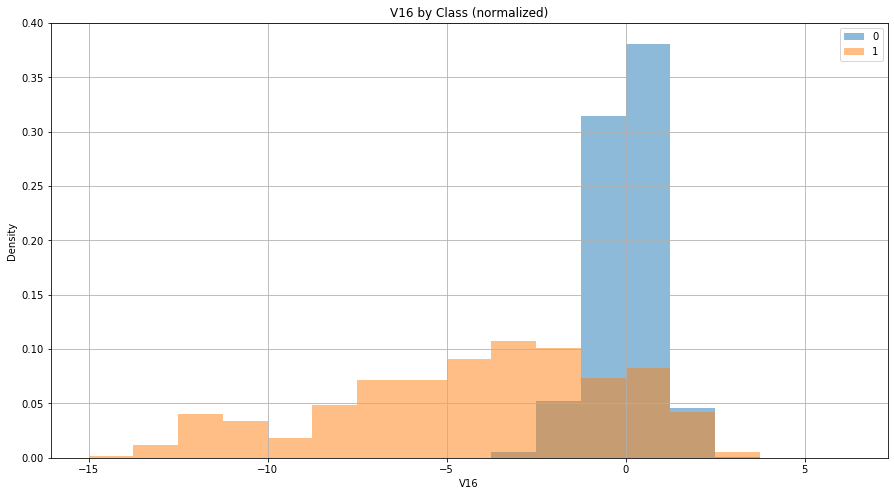

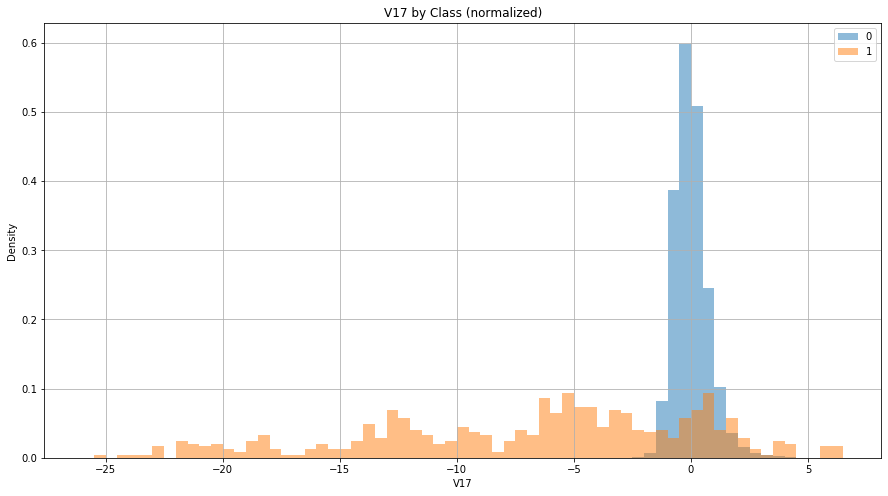

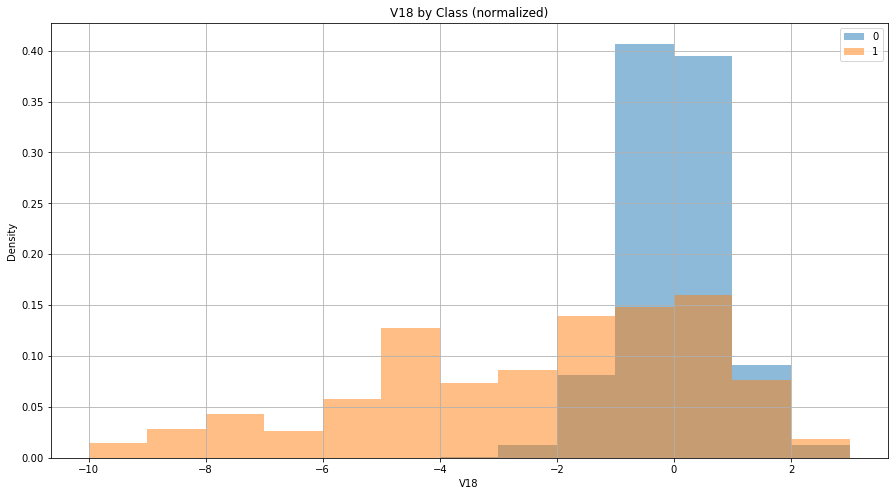

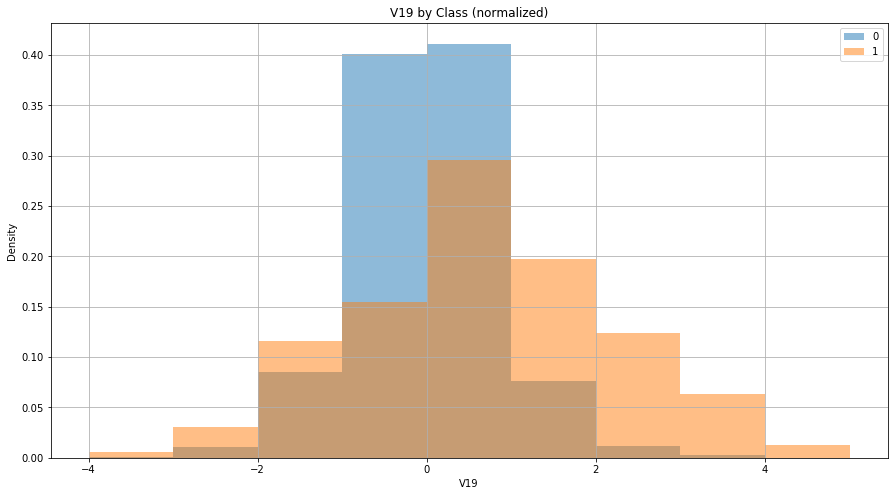

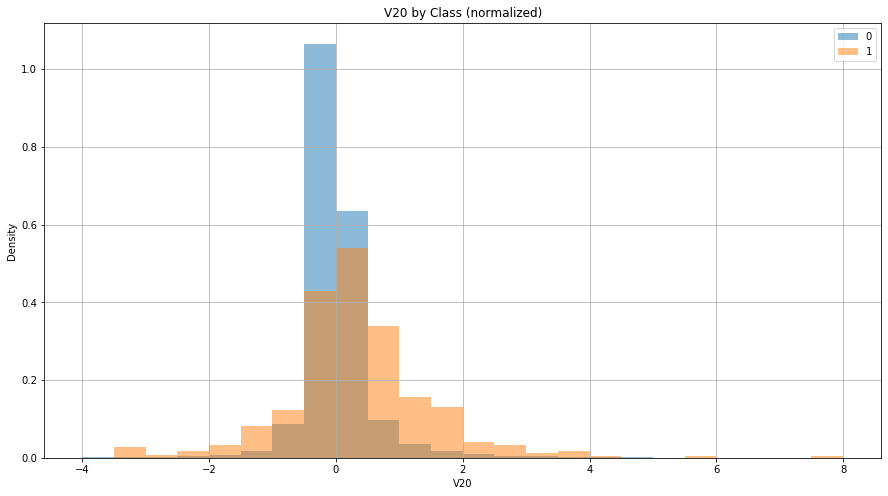

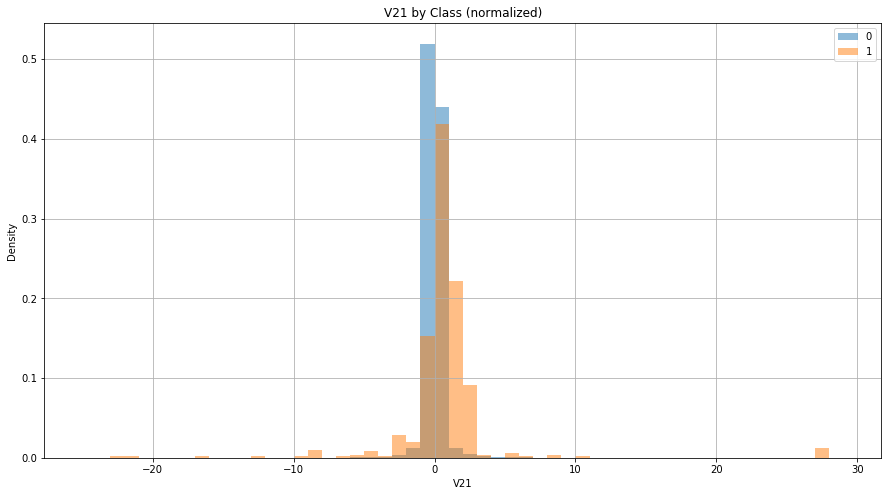

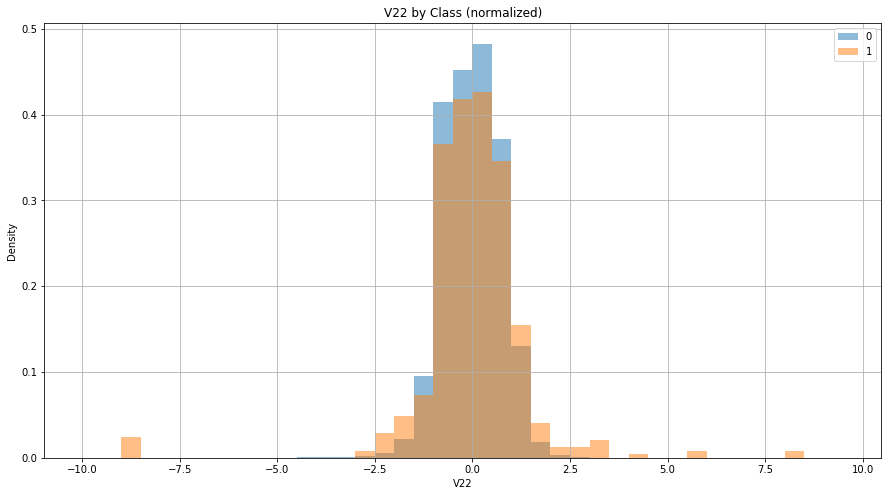

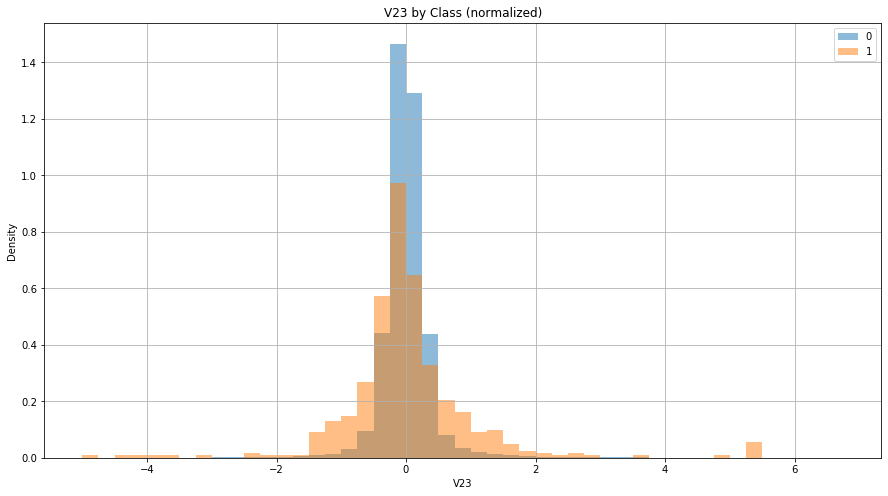

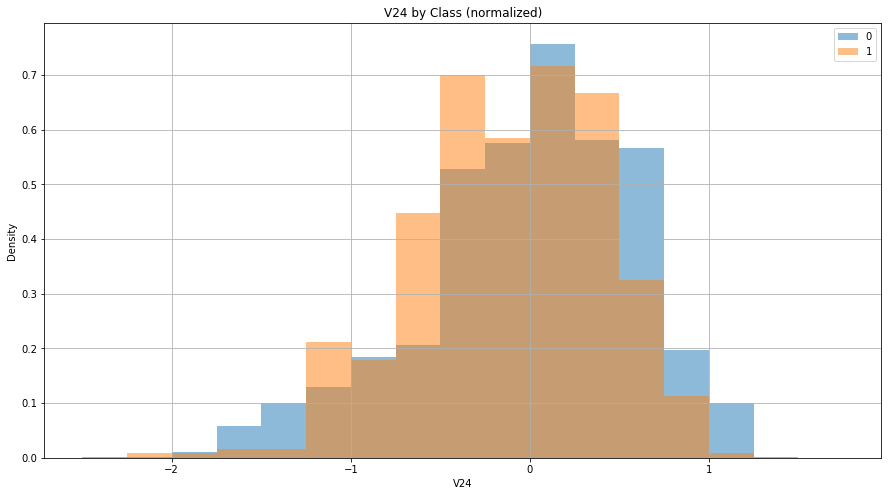

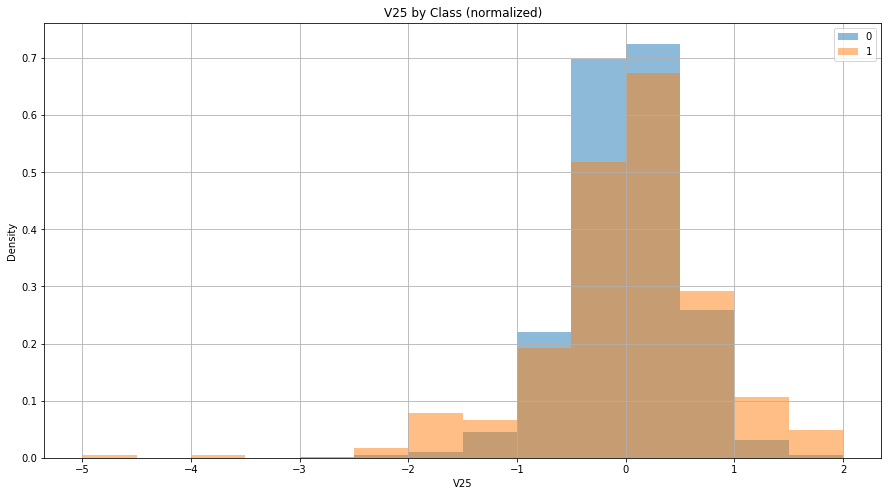

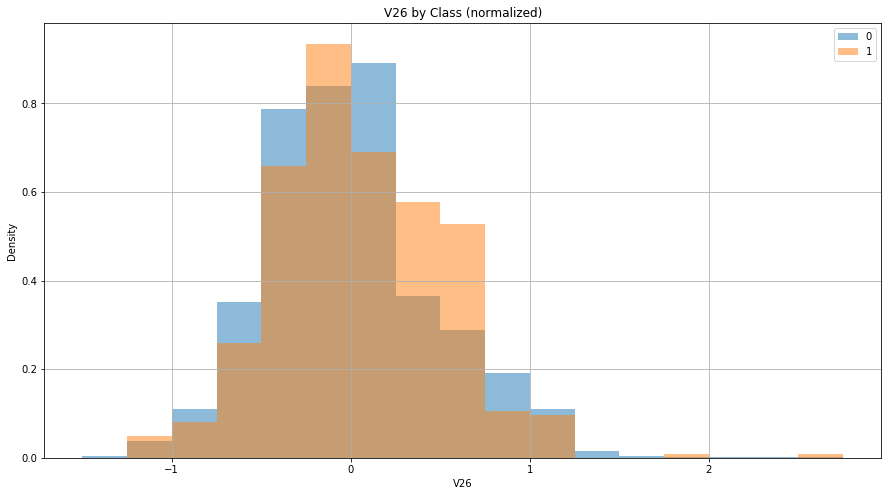

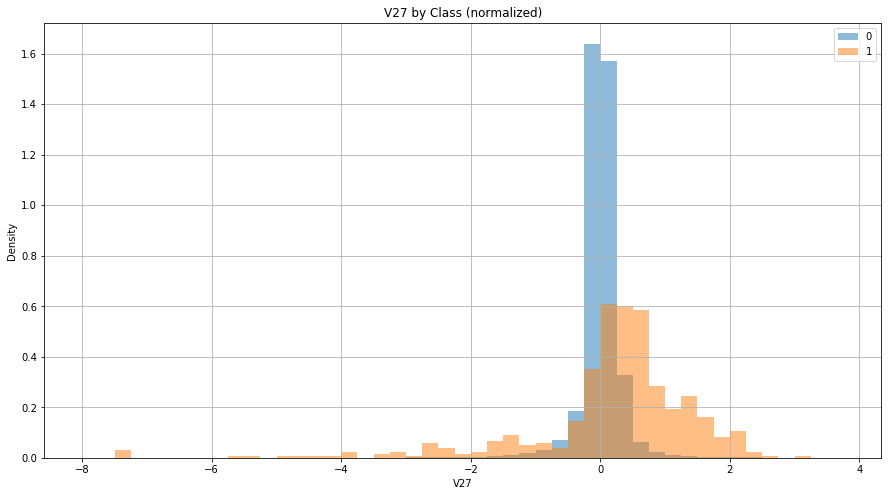

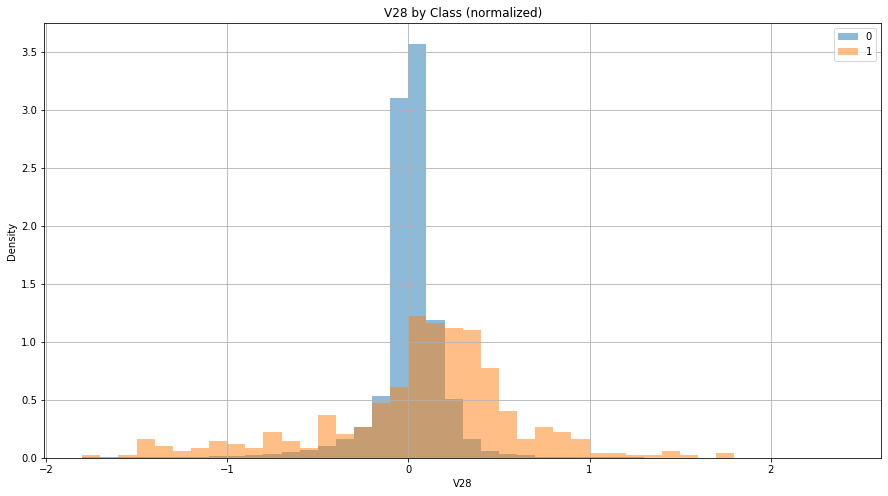

In [46]:
bins_list = [
    np.arange(-35, 10, 2.5), #v1
    np.arange(-10, 25, 2.5), #v2
    np.arange(-35, 10, 2.5), #v3
    np.arange(-6, 14, 1), #v4
    np.arange(-25, 12, 2), #v5
    np.arange(-7.5, 8.5, 1), #v6
    np.arange(-35, 11, 2), #v7
    np.arange(-45, 25, 2), #v8
    np.arange(-15, 8, 1), #v9
    np.arange(-25, 15, 2), #v10
    np.arange(-4, 14, 1), #v11
    np.arange(-20, 6, 2), #v12
    np.arange(-4, 5, 1), #v13
    np.arange(-20, 7.5, 1.25), #v14
    np.arange(-5, 5, 1), #v15
    np.arange(-15, 7.5, 1.25), #v16
    np.arange(-26, 7, 0.5), #v17
    np.arange(-10, 4, 1), #v18
    np.arange(-4, 6, 1), #v19
    np.arange(-4, 8.5, 0.5), #v20
    np.arange(-25, 30, 1), #v21
    np.arange(-10, 10, 0.5), #v22
    np.arange(-5, 7, 0.25), #v23
    np.arange(-2.5, 2, 0.25), #v24
    np.arange(-5, 2.5, 0.5), #v25
    np.arange(-1.5, 3, 0.25), #v26
    np.arange(-8, 4, 0.25), #v27
    np.arange(-1.8, 2.5, 0.1), #v28
]

for var, bins in zip(range(1, len(bins_list)+1), bins_list):
    multiple_histograms_plot(df, x=f'V{var}', hue='Class',
                             bins=bins, density=True,
                             title=f"Distribuições de 'V{var}', "
                                    "segmentadas por 'Class' e normalizadas")